In [1]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import plotly.express as px
import os

In [2]:
df = pd.read_csv("/content/Advertising.csv")

In [4]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.shape

(200, 5)

In [9]:
df.size


1000

In [10]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [11]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [13]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [17]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [18]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

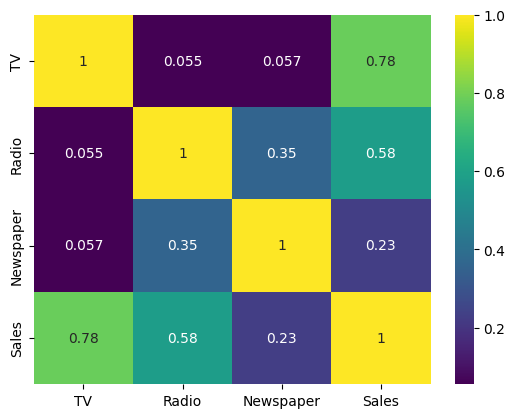

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

Text(0, 0.5, 'TV')

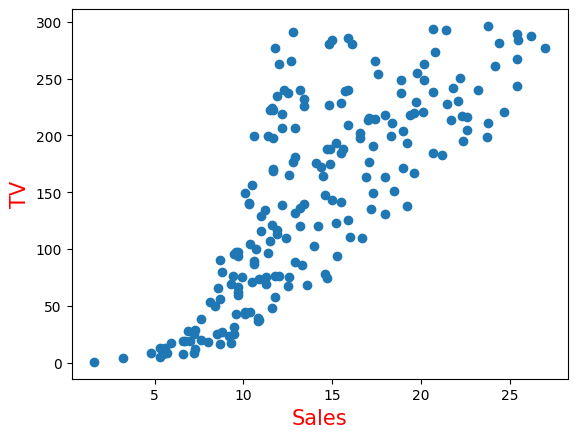

In [21]:
plt.scatter(df['Sales'],df['TV'])
plt.xlabel('Sales', color='r', size=15)
plt.ylabel('TV', color='r', size=15)

Text(0, 0.5, 'Radio')

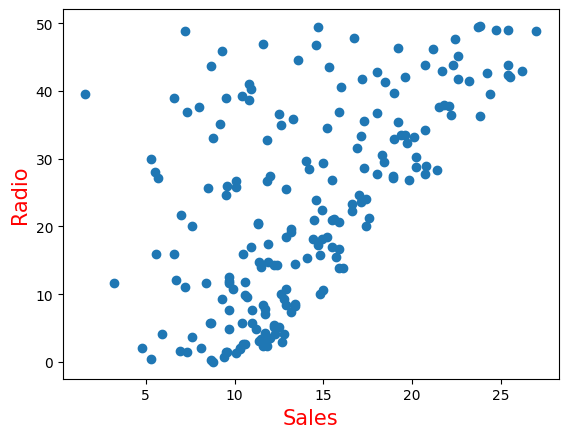

In [22]:
plt.scatter(df['Sales'],df['Radio'])
plt.xlabel('Sales', color='r', size=15)
plt.ylabel('Radio', color='r', size=15)

Text(0, 0.5, 'Newspaper')

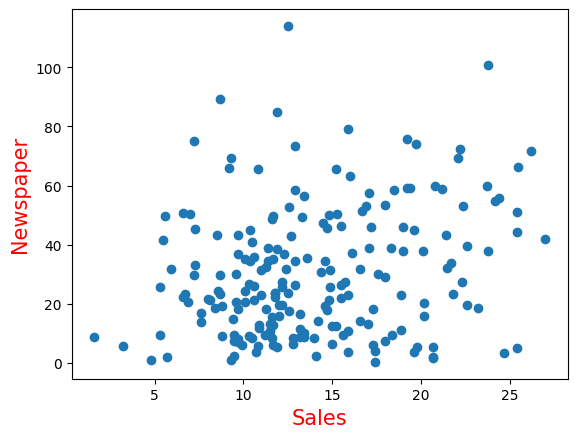

In [23]:
plt.scatter(df['Sales'],df['Newspaper'])
plt.xlabel('Sales', color='r', size=15)
plt.ylabel('Newspaper', color='r', size=15)

In [24]:
x = df.drop(['Sales'],1)
x.head()


<ipython-input-24-31b65f42bbe5>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop(['Sales'],1)


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [25]:
y = df['Sales']

In [26]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(x_test)

In [32]:
y_pred

array([10.50948755, 20.05723558, 16.82665516, 19.09405782, 20.94383845,
       13.25348896, 11.87554518, 12.4882643 , 20.51420388, 20.91328754,
       10.90182094, 19.44307823,  6.5040246 , 15.3178433 ,  9.04147699,
        8.03952046, 16.26581002, 12.10312044, 17.12086602, 11.28131376,
       17.07036157,  9.84452136, 20.70077487, 17.17479561, 15.19498306,
       21.96631309, 19.1587532 , 10.09216975, 19.40214482, 14.88180369,
       14.27844074,  7.69173892, 10.00183154, 14.82404891,  7.29177732,
       13.63453936,  7.59380446, 11.84106127, 13.61631336, 15.18810875])

In [33]:
coefficient = lr.coef_
coefficient

array([0.0455864 , 0.18569816, 0.00223281])

In [34]:
intercept = lr.intercept_
intercept

2.817275135294997

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test)*100

100.0